# Let's build Linear Regression from Scratch

Imports and Version Checking

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3


## The actual class for linear_regression.

In [3]:
import numpy as np

class linear_regression:
    
    def __init__(self, w_intercept=True):
        self.coef_ = None
        self.intercept = w_intercept
        self.is_fit = False
        
    def add_intercept(self,X):
        """
        Adds an 'all 1's' bias term to function as the y-intercept
        """
        if type(X) == type(np.array([5])):
            rows = X.shape[0]
        else:
            X = np.array([[X]])
            rows = 1
        inter = np.ones(rows).reshape(-1,1)
        return np.hstack((X,inter))
        
    def fit(self, X, y):
        """
        Read in X (all features) and y (target) and use the Linear Algebra solution
        to extract the coefficients for Linear Regression.
        """
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1,1)
        if y.ndim == 1:
            y = y.reshape(-1,1)
        if self.intercept:
            X = self.add_intercept(X)
        temp_xtx = np.linalg.inv(np.dot(X.T,X))
        temp_xty = np.dot(X.T,y)
        self.coef_ = np.dot(temp_xtx,temp_xty)
        self.is_fit = True
    
    def predict(self,X):
        """
        Takes in a new X value (that must be the same shape as the original X for fitting)
        and returns the predicted y value, using the coefficients from fitting.
        """
        if not self.is_fit:
            raise ValueError("You have to run the 'fit' method before using predict!")
        if type(X) == type([5]):
            X = np.array(X)
        if type(X) == type(5) or type(X) == type(5.):
            X = np.array([X])
        if X.ndim == 1:
            X = X.reshape(-1,1)
        if self.intercept:
            X = self.add_intercept(X)
        return np.dot(X,self.coef_)[0][0]
    
    def score(self, X, true):
        """
        Takes in X, y pairs and measures the performance of the model.
        Returns negative mean squared error.
        ---
        Inputs: X, y (features, labels; np.arrays)
        Outputs: Negative Mean Square Error (float)
        """
        pred = self.predict(X)
        mse = np.mean(np.square(true-pred))
        return -mse

In [4]:
def gen_data(coef=3.5, intercept=5., num_points=100):
    X = np.random.uniform(0,10,num_points)
    y = coef*X + np.random.normal(0,1.5,100) + intercept
    return X,y

X,y = gen_data()
lr = linear_regression(w_intercept=True)
lr.fit(X,y)
lr.coef_

array([[ 3.4378343 ],
       [ 5.67472707]])

In [5]:
import seaborn as sns
model_vals = []
for val in np.linspace(0,10,100):
    model_vals.append(float(lr.predict(val)))

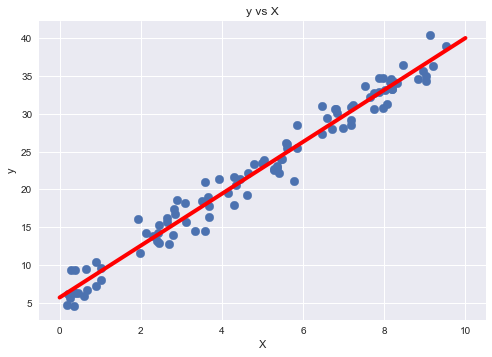

In [6]:
plt.scatter(X,y,s=75)
plt.plot(np.linspace(0,10,100),model_vals,'r-',lw=4)
plt.xlabel('X')
plt.ylabel('y')
plt.title("y vs X");

In [7]:
X_test, y_test = gen_data()
lr.score(X_test, y_test)

-272.51469722756212

In [9]:
import sys
sys.path.append('../modules')
from stats_regress import *
pred = lr.predict(X_test)
test_model_results(X_test, y_test, pred)

Mean Squared Error:  272.514697228
Root Mean Squared Error:  16.5080191794
Mean Absolute Error:  -13.2452124
R2:  0.999948181104
Adj R2:  0.999947652339


## Let's see it in action with X^2

In [10]:
X = np.linspace(0,10,100)
y = 2.5*X*X + np.random.normal(0,1.5,100) + 5.

lr = linear_regression(w_intercept=True)
lr.fit(X*X,y)
lr.coef_

array([[ 2.49971629],
       [ 4.98434876]])

In [11]:
lr.predict(0)

4.9843487627461229

In [12]:
import seaborn as sns
model_vals = []
for val in np.linspace(0,10,100):
    model_vals.append(float(lr.predict(val*val)))

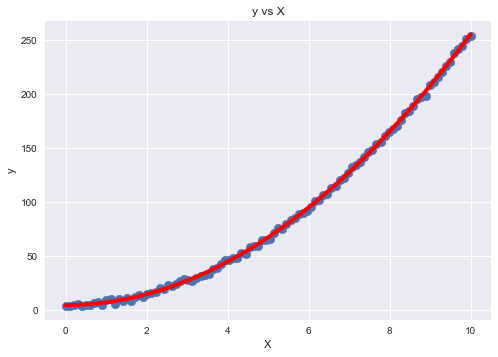

In [13]:
plt.scatter(X,y,s=75)
plt.plot(np.linspace(0,10,100),model_vals,'r-',lw=4)
plt.xlabel('X')
plt.ylabel('y')
plt.title("y vs X");

## Check Error handling for fit-predict

In [14]:
linear_regression = linear_regression()
linear_regression.predict([1])

ValueError: You have to run the 'fit' method before using predict!